In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/drive/MyDrive/kaggle"

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
pwd

'/content'

In [ ]:
!kaggle datasets download -d andrewmvd/heart-failure-clinical-data

  0% 0.00/3.97k [00:00<?, ?B/s]
100% 3.97k/3.97k [00:00<00:00, 3.73MB/s]


In [ ]:
#!unzip -u "/content/gdrive/MyDrive/data/archive.zip" "/content/gdrive/MyDrive/data/"

Archive:  /content/gdrive/MyDrive/data/archive.zip
caution: filename not matched:  /content/gdrive/MyDrive/data/


In [ ]:
#unzipping the zip files and deleting the zip files
!unzip \*.zip  && rm *.zip

Archive:  heart-failure-clinical-data.zip
  inflating: heart_failure_clinical_records_dataset.csv  


In [ ]:
#!unzip /content/gdrive/MyDrive/data/archive.zip

Archive:  /content/gdrive/MyDrive/data/archive.zip
  inflating: heart_failure_clinical_records_dataset.csv  


In [ ]:
#!ls

gdrive	sample_data


In [ ]:
# \*.zip  && rm *.zip

unzip:  cannot find or open *.zip, *.zip.zip or *.zip.ZIP.

No zipfiles found.


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler

from sklearn.feature_selection import RFE

from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [ ]:
data = pd.read_csv('/content/heart_failure_clinical_records_dataset.csv')
print('Data read successfully')

#data_1 = data.copy()

data.tail()

Data read successfully


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
294,62.0,0,61,1,38,1,155000.0,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.0,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.0,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.0,1.4,140,1,1,280,0
298,50.0,0,196,0,45,0,395000.0,1.6,136,1,1,285,0


In [ ]:
data.shape
data.info()
data.describe(include='all')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

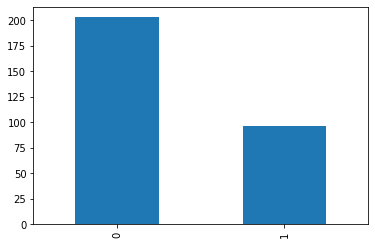

In [ ]:
data['DEATH_EVENT'].value_counts().plot(kind='bar')
plt.show()

In [ ]:
data.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

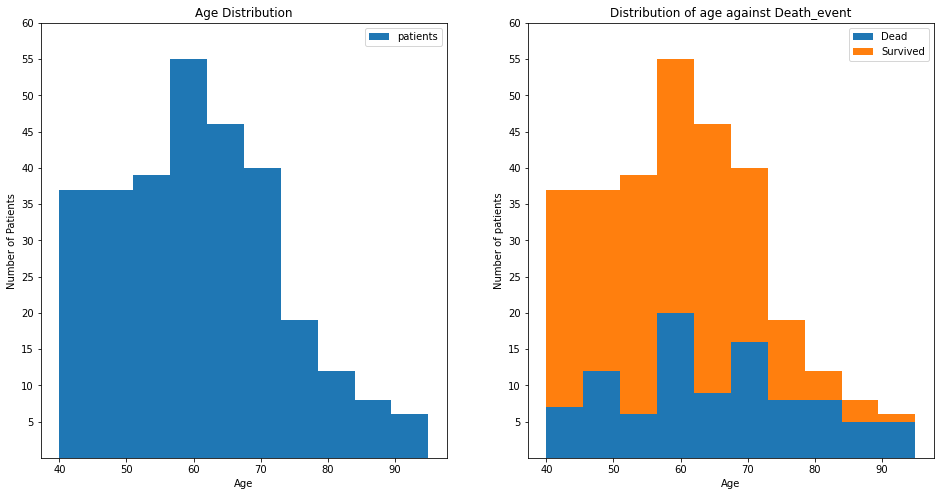

In [ ]:
fig,ax = plt.subplots(1,2,figsize=(16,8))
ax[0].hist(data['age'],label = 'patients')
ax[0].set_xlabel('Age')
ax[0].set_ylabel('Number of Patients')
ax[0].set_yticks([5,10,15,20,25,30,35,40,45,50,55,60])
ax[0].legend()
ax[0].set_title('Age Distribution')
ax[1].hist(x = [data[data['DEATH_EVENT']==1]['age'],data[data['DEATH_EVENT']==0]['age']],stacked=True,label=['Dead','Survived'])
ax[1].set_xlabel('Age')
ax[1].set_ylabel('Number of patients')
ax[1].set_yticks([5,10,15,20,25,30,35,40,45,50,55,60])
ax[1].set_title('Distribution of age against Death_event')
ax[1].legend()

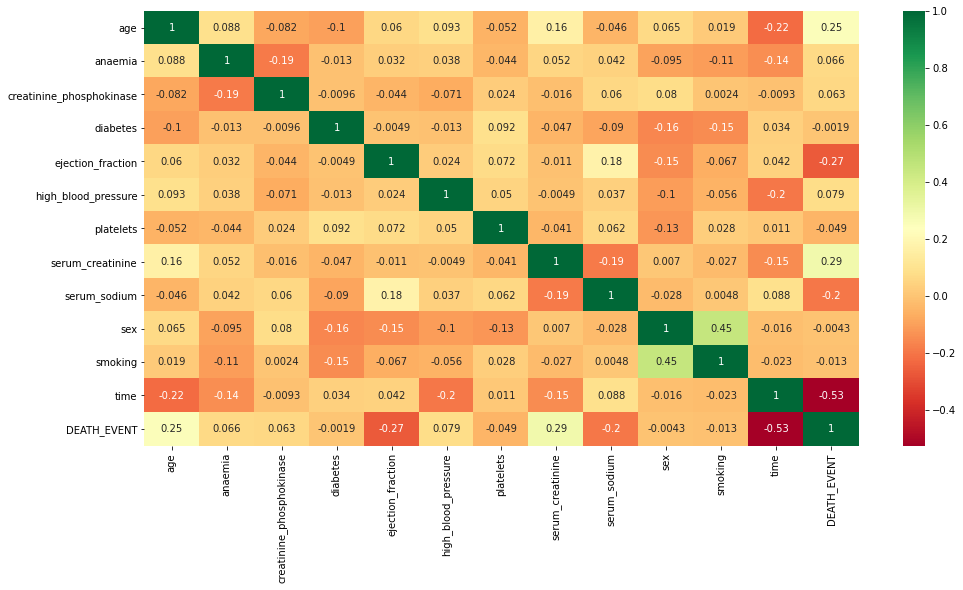

In [ ]:
plt.figure(figsize=[16,8])
corr = sns.heatmap(data.corr(), annot=True, cmap="RdYlGn")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb9acff8d90>,
      dtype=object)

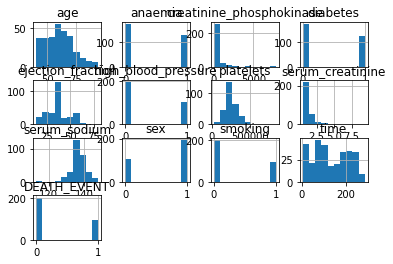

In [ ]:
data.hist()

In [ ]:
y = data['DEATH_EVENT']
X = data.drop(['DEATH_EVENT'], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(X_train)
x_test = scaler.transform(X_test)
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    display(X_test)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
206,40.000,1,101,0,40,0,226000.00,0.80,141,0,0,187
188,60.667,1,151,1,40,1,201000.00,1.00,136,0,0,172
12,45.000,1,981,0,30,0,136000.00,1.10,137,1,0,11
219,55.000,0,582,1,35,1,371000.00,0.70,140,0,0,197
237,70.000,0,232,0,30,0,173000.00,1.20,132,1,0,210
136,65.000,1,59,1,60,0,172000.00,0.90,137,0,0,107
228,65.000,0,56,0,25,0,237000.00,5.00,130,0,0,207
205,50.000,1,167,1,45,0,362000.00,1.00,136,0,0,187
52,60.000,0,3964,1,62,0,263358.03,6.80,146,0,0,43
108,63.000,0,936,0,38,0,304000.00,1.10,133,1,1,88


In [ ]:
#K Neighbors Classifier

In [ ]:
knn_scores = []
for k in range(1,11):
    knn_classifier = KNeighborsClassifier(n_neighbors = k)
    knn_classifier.fit(X_train, y_train)
    knn_scores.append(knn_classifier.score(X_test, y_test))

Text(0.5, 1.0, 'K Neighbors Classifier scores for different K values')

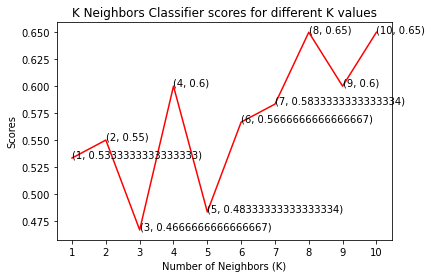

In [ ]:
plt.plot([k for k in range(1, 11)], knn_scores, color = 'red')
for i in range(1,11):
    plt.text(i, knn_scores[i-1], (i, knn_scores[i-1]))
plt.xticks([i for i in range(1, 11)])
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Scores')
plt.title('K Neighbors Classifier scores for different K values')

In [ ]:
print("The score for K Neighbors Classifier is {}% with {} nieghbors.".format(knn_scores[7]*100, 8))

The score for K Neighbors Classifier is 65.0% with 8 nieghbors.


In [ ]:
#Support Vector Classifier

In [ ]:
svc_scores = []
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
for i in range(len(kernels)):
    svc_classifier = SVC(kernel = kernels[i])
    svc_classifier.fit(X_train, y_train)
    svc_scores.append(svc_classifier.score(X_test, y_test))

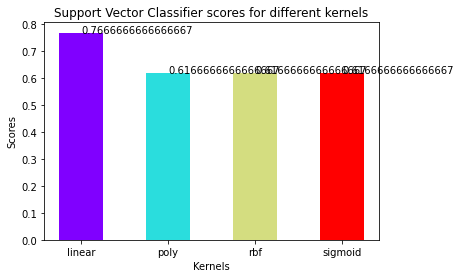

In [ ]:
from matplotlib.cm import rainbow
%matplotlib inline
colors = rainbow(np.linspace(0, 1, len(kernels)))
plt.bar(kernels, svc_scores, color = colors,width = 0.5)
for i in range(len(kernels)):
    plt.text(i, svc_scores[i], svc_scores[i])
    plt.xlabel('Kernels')
    plt.ylabel('Scores')
    plt.title('Support Vector Classifier scores for different kernels')

  

In [ ]:
for i in range(len(kernels)):
  print(svc_scores[i])

0.7666666666666667
0.6166666666666667
0.6166666666666667
0.6166666666666667


In [ ]:
print("The score for Support Vector Classifier is {}% with {} kernel.".format(svc_scores[0]*100, 'linear'))

The score for Support Vector Classifier is 76.66666666666667% with linear kernel.


In [ ]:

#Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
dt_scores = []
for i in range(1, len(X.columns) + 1):
    dt_classifier = DecisionTreeClassifier(max_features = i, random_state = 0)
    dt_classifier.fit(X_train, y_train)
    dt_scores.append(dt_classifier.score(X_test, y_test))

Text(0.5, 1.0, 'Decision Tree Classifier scores for different number of maximum features')

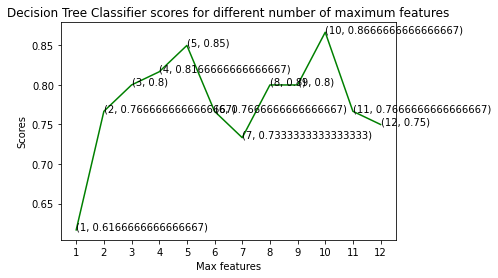

In [ ]:
plt.plot([i for i in range(1, len(X.columns) + 1)], dt_scores, color = 'green')
for i in range(1, len(X.columns) + 1):
    plt.text(i, dt_scores[i-1], (i, dt_scores[i-1]))
plt.xticks([i for i in range(1, len(X.columns) + 1)])
plt.xlabel('Max features')
plt.ylabel('Scores')
plt.title('Decision Tree Classifier scores for different number of maximum features')

In [ ]:
print("The score for Decision Tree Classifier is {}% with {} maximum features.".format(dt_scores[9]*100, [10]))

The score for Decision Tree Classifier is 86.66666666666667% with [10] maximum features.


In [ ]:
#Random Forest Classifier

In [ ]:
rf_scores = []
estimators = [5,1000,5001]
for i in estimators:
    rf_classifier = RandomForestClassifier(n_estimators = i, random_state = 0)
    rf_classifier.fit(X_train, y_train)
    rf_scores.append(rf_classifier.score(X_test, y_test))

Text(0.5, 1.0, 'Random Forest Classifier scores for different number of estimators')

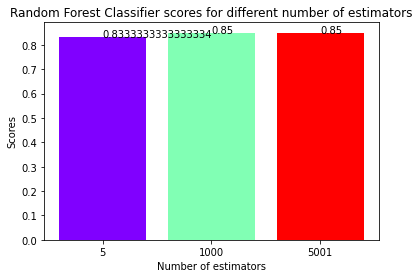

In [ ]:
colors = rainbow(np.linspace(0, 1, len(estimators)))
plt.bar([i for i in range(len(estimators))], rf_scores, color = colors, width = 0.8)
for i in range(len(estimators)):
    plt.text(i, rf_scores[i], rf_scores[i])
plt.xticks(ticks = [i for i in range(len(estimators))], labels = [str(estimator) for estimator in estimators])
plt.xlabel('Number of estimators')
plt.ylabel('Scores')
plt.title('Random Forest Classifier scores for different number of estimators')

In [ ]:
print("The score for Random Forest Classifier is {}% with {} estimators.".format(rf_scores[1]*100, [1000, 5001]))

The score for Random Forest Classifier is 85.0% with [1000, 5001] estimators.


In [ ]:
from sklearn.naive_bayes import GaussianNB
    
NB = GaussianNB()
#model fitting
NB.fit(X_train, y_train)
print("train score: ",NB.score(X_train, y_train))
print("test score:  ",NB.score(X_train, y_train))
    #data prediction
NB_pred = NB.predict(X_test)
    
NBScore = accuracy_score(y_test,NB_pred)

print("accuracy score of  Naive Bayes Algorithm = " ,NBScore)

train score:  0.8284518828451883
test score:   0.8284518828451883
accuracy score of  Naive Bayes Algorithm =  0.7666666666666667


In [ ]:
NBScore

0.7666666666666667

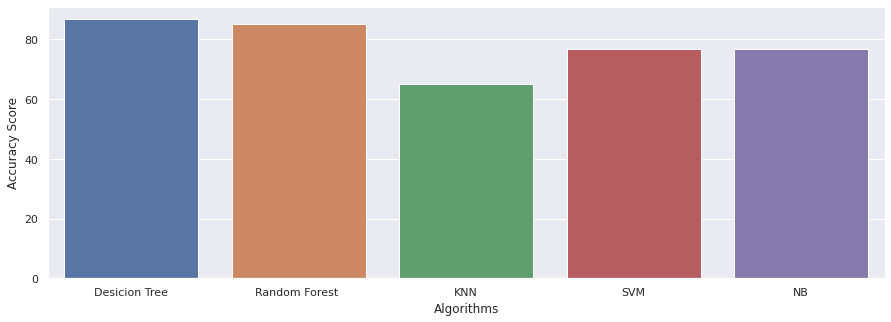

In [ ]:
#Plotting seaborn comapritive Accuracies Graph
scores = [dt_scores[9]*100, rf_scores[1]*100,knn_scores[7]*100,svc_scores[0]*100,NBScore*100]
algorithms = ["Desicion Tree", "Random Forest ","KNN","SVM","NB"]
sns.set(rc={'figure.figsize': (15, 5)})
plt.xlabel("Algorithms")
plt.ylabel("Accuracy Score")
sns.barplot(algorithms, scores)

In [ ]:
import pickle
pickle.dump(dt_classifier, open('model.pkl', 'wb'))
#model = pickle.load(open('model.pkl', 'rb'))
#print(model)

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving ezyzip (1) (1).zip to ezyzip (1) (1).zip


In [ ]:
import zipfile
from zipfile import ZipFile

file_name = '/content/templates.zip'

with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print('Extracted Successfully')

Extracted Successfully


In [ ]:
!pip install flask-ngrok

In [ ]:
import flask
from flask import Flask, render_template, request
import pickle
import numpy as np
from flask_ngrok import run_with_ngrok
import warnings
warnings.filterwarnings('ignore')

app = Flask(__name__)
run_with_ngrok(app)

model = pickle.load(open('model.pkl', 'rb'))

@app.route('/', methods=['GET'])
def home():
  return render_template('index.html')

@app.route('/', methods=['GET', "POST"])
def predict():
  input_values = [float(x) for x in request.form.values()]
  print(input_values)
  inp_features = [input_values]
  print(inp_features)
  prediction = model.predict(inp_features)
  print(prediction)
  if prediction==1:
    return render_template('index.html', prediction_text='Death event took Place. Person is no more')
  else:
    return render_template('index.html', prediction_text='Death event not took Place. Person is alive')
#app.debug = True
app.run()

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)


 * Running on http://490791a0ad45.ngrok.io
 * Traffic stats available on http://127.0.0.1:4040


127.0.0.1 - - [19/Aug/2021 08:09:38] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [19/Aug/2021 08:09:40] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [19/Aug/2021 08:09:41] "GET /favicon.ico HTTP/1.1" 404 -
127.0.0.1 - - [19/Aug/2021 08:12:14] "POST / HTTP/1.1" 200 -


[75.0, 0.0, 582.0, 0.0, 20.0, 1.0, 265000.0, 1.9, 130.0, 1.0, 0.0, 4.0]
[[75.0, 0.0, 582.0, 0.0, 20.0, 1.0, 265000.0, 1.9, 130.0, 1.0, 0.0, 4.0]]
[1]


127.0.0.1 - - [19/Aug/2021 08:15:40] "POST / HTTP/1.1" 200 -


[62.0, 0.0, 61.0, 1.0, 38.0, 1.0, 155000.0, 1.1, 143.0, 1.0, 1.0, 270.0]
[[62.0, 0.0, 61.0, 1.0, 38.0, 1.0, 155000.0, 1.1, 143.0, 1.0, 1.0, 270.0]]
[0]
